In [2]:
# read data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/2决策模型/data/price_volatility.xlsx')
df2 = pd.read_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/2决策模型/data/price_pred.xlsx')
R_g = df['u_gold']
R_b = df['u_bitcoin']
sigma_g = df['sigma_gold']
sigma_b = df['sigma_bitcoin']
pred_g = df2['gold_pred']
pred_b = df2['bitcoin_pred']

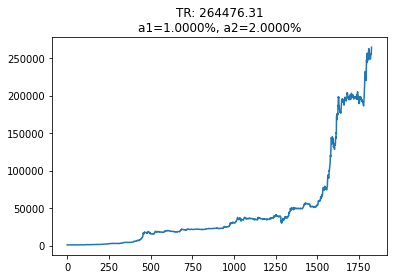

In [3]:
df3 = pd.read_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/2决策模型/data/price_pred_volatility.xlsx')
R_g = df3['u_gold']
R_b = df3['u_bitcoin']


# print(R_g.shape)
def cal_return(g,b,a1=0.01,a2=0.02,c0=1000):
    # g,b -> (1826,)
    n = len(g)
    C = np.zeros(n)
    G = np.zeros(n)
    B = np.zeros(n)
    C[0] = 1000
    portfolio_value = np.zeros(n)
    # TR = 0
    for t in range(n-1):
        tran_loss =  abs(g[t]) * a1 + abs(b[t]) * a2
        c = -tran_loss-b[t]-g[t]
        # print(C[t])
        C[t] = C[t] + c
        G[t] = (G[t] + g[t])
        B[t] = (B[t] + b[t])
        portfolio_value[t] = C[t] + G[t] + B[t]
        
        # print(t,C[t],G[t],B[t],portfolio_value[t],sep='\t')
        C[t+1] = C[t]
        G[t+1] = G[t] * (1+R_g[t])
        B[t+1] = B[t] * (1+R_b[t])
    
    portfolio_value[n-1] = C[n-1] + G[n-1] + B[n-1]
    TR = portfolio_value[n-1] - portfolio_value[0]
    return TR,C,G,B,portfolio_value

def simulate_resolution1():
    n = len(R_g)

    c = np.zeros(n)
    g = np.zeros(n)
    b = np.zeros(n)
    C = np.zeros(n)
    G = np.zeros(n)
    B = np.zeros(n)
    C[0] = 1000
    portfolio_value = np.zeros(n)
    r1 = 0.25
    r2 = 0.50
    # a1 = 0.01
    # a2 = 0.02
    a1 = np.random.normal(0.01, 0.002)
    a2 = np.random.normal(0.02, 0.004)
    # a1 = np.random.uniform(0.004,0.016)

    for t in range(n-1):
        # r1 = rr1 + (np.random.rand()-0.5) * 0.4
        # r2 = rr2 + (np.random.rand()-0.5) * 0.8
        if abs(R_g[t+1]) > a1 :
            if R_g[t+1] < 0:
                g[t] = -G[t]*r2
            else:
                g[t] = C[t]*r1

        if abs(R_b[t+1])>a2:
            if R_b[t+1]<0:
                b[t] = -B[t]*r2
            else:
                b[t] = C[t]*r1 
        tran_loss = abs(g[t]) * a1 + abs(b[t]) * a2
        c = -tran_loss-b[t]-g[t]
        # print(C[t])
        C[t] = C[t] + c
        G[t] = (G[t] + g[t])
        B[t] = (B[t] + b[t])

        C[t+1] = C[t]
        G[t+1] = G[t] * (1+R_g[t])
        B[t+1] = B[t] * (1+R_b[t])
    return g,b,a1,a2

def simulate_resolution(a1=0.01,a2=0.02):
    n = len(R_g)
    # a1 = np.random.normal(0.01, 0.002)
    # a2 = np.random.normal(0.02, 0.004)
    c = np.zeros(n)
    g = np.zeros(n)
    b = np.zeros(n)
    C = np.zeros(n)
    G = np.zeros(n)
    B = np.zeros(n)
    C[0] = 1000
    portfolio_value = np.zeros(n)
    rr1 = 0.25
    rr2 = 0.5
    for t in range(n-1):

        r1 = rr1 + (np.random.rand()-0.5) * 0
        r2 = rr2 + (np.random.rand()-0.5) * 0

        dr= 1+(np.random.rand() - 0.8) * 0
        dr_g = 1+(np.random.rand() - 0.2) * 0
        ag = abs(R_g[t+1]) - a1 * dr_g
        ab = abs(R_b[t+1]) - a2 * dr
        if abs(R_g[t+1]) > a1 * dr_g and abs(R_b[t+1])>a2 * dr:
            if R_g[t+1] > 0 and R_b[t+1] > 0:
                g[t] = C[t]*r1*1.8*(ag/(ag+ab))
                b[t] = C[t]*r1*1.8*(ab/(ag+ab))
            elif R_g[t+1] > 0 and R_b[t+1] <= 0:
                g[t] = C[t]*r1*1.8
                b[t] = -B[t]*r2
            elif R_g[t+1] <= 0 and R_b[t+1] > 0:
                g[t] = -G[t]*r2
                b[t] = C[t]*r1*1.8
            else:
                g[t] = -G[t]*r2
                b[t] = -B[t]*r2

        elif abs(R_g[t+1]) > a1 * dr_g and abs(R_b[t+1]) <= a2 * dr:
            if R_g[t+1] < 0:
                g[t] = -G[t]*r2
            else:
                g[t] = C[t]*r1*1.5

        elif abs(R_g[t+1]) <= a1 * dr_g and abs(R_b[t+1]) > a2 * dr:
            if R_b[t+1]<0:
                b[t] = -B[t]*r2
            else:
                b[t] = C[t]*r1*1.5

            
        tran_loss = abs(g[t]) * a1 + abs(b[t]) * a2
        c = -tran_loss-b[t]-g[t]
        # print(C[t])
        C[t] = C[t] + c
        G[t] = (G[t] + g[t])
        B[t] = (B[t] + b[t])

        C[t+1] = C[t]
        G[t+1] = G[t] * (1+R_g[t])
        B[t+1] = B[t] * (1+R_b[t])
    return g,b,a1,a2

g,b,a1,a2 = simulate_resolution()
TR,C,G,B,portfolio_value = cal_return(g,b,a1,a2)

df_res = pd.DataFrame()
df_res['date'] = df['date']
df_res['delta_g'] = g
df_res['delta_b'] = b
df_res['C'] = C
df_res['G'] = G
df_res['B'] = B
df_res['value'] = portfolio_value
plt.plot(portfolio_value)
plt.title('TR: {:.2f}\na1={:.4%}, a2={:.4%}'.format(portfolio_value[-1], a1,a2))
plt.show()

In [4]:
aa1 = np.linspace(0.01-0.007,0.01+0.007,5)
aa2 = np.linspace(0.02-0.014,0.02+0.014,5)
print(aa1)
print(aa2)


[0.003  0.0065 0.01   0.0135 0.017 ]
[0.006 0.013 0.02  0.027 0.034]


In [5]:
n = 50
res = np.empty((n,4))
aa1 = np.linspace(0.01-0.005,0.01+0.005,50)
aa2 = np.linspace(0.02-0.010,0.02+0.010,50)
for i in range(n):
    g,b,a1,a2 = simulate_resolution(aa1[i],aa2[i])
    TR,C,G,B,portfolio_value = cal_return(g,b,a1,a2)
    res[i] = a1,a2,TR,a1+a2


In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

scaler1 = StandardScaler()
scaler2 = MinMaxScaler()
scaler3 = RobustScaler()
res_arg = np.argsort(res[:,3])
res = res[res_arg]
# tr = scaler3.fit_transform(res[:,2].reshape(-1,1))
tr = res[:,2].reshape(-1,1)

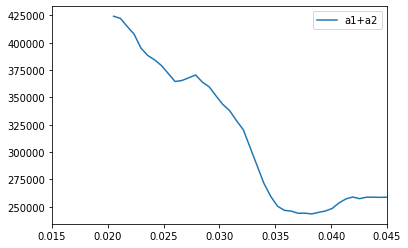

[0.015      0.01561224 0.01622449 0.01683673 0.01744898 0.01806122
 0.01867347 0.01928571 0.01989796 0.0205102  0.02112245 0.02173469
 0.02234694 0.02295918 0.02357143 0.02418367 0.02479592 0.02540816
 0.02602041 0.02663265 0.0272449  0.02785714 0.02846939 0.02908163
 0.02969388 0.03030612 0.03091837 0.03153061 0.03214286 0.0327551
 0.03336735 0.03397959 0.03459184 0.03520408 0.03581633 0.03642857
 0.03704082 0.03765306 0.03826531 0.03887755 0.0394898  0.04010204
 0.04071429 0.04132653 0.04193878 0.04255102 0.04316327 0.04377551
 0.04438776 0.045     ]


In [7]:
import numpy as np
import pandas as pd

tr=tr.reshape(-1,)
y = pd.DataFrame(tr)
# y[:].rolling(12).mean().plot()
plt.plot(res[:,3],y[:].rolling(10).mean(), label = 'a1+a2')
plt.xlim(0.015,0.045)
plt.legend()
plt.show()
print(res[:,3])

In [63]:
80000/(0.012**2)

555555555.5555556

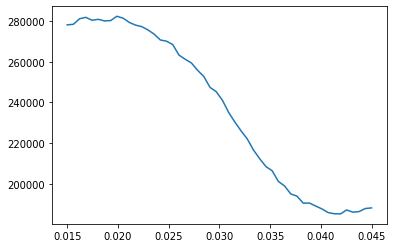

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
aa1 = np.linspace(0.01-0.005,0.01+0.005,50)
aa2 = np.linspace(0.02-0.010,0.02+0.010,50)

y = np.zeros(50)
x = aa1 + aa2
for i in range(50):
    p = 0
    if i > 30:
        p=(0.032-x[i])**2 * 7 * 10 ** 8
    y[i] = 280000 - (x[i]-0.0185) ** 2 * 3 * 10**8 + np.random.rand() * 3000 + p
df_weizao = pd.DataFrame()
df_weizao['a1+a2']=x
df_weizao['TR']=  y

plt.plot(x,y)
df_weizao.to_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/2决策模型/data/伪造/灵敏度伪造.xlsx')
# df_weizao['TR'].plot()

In [ ]:
df_weizao.to_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/2决策模型/data/伪造/灵敏度伪造.xlsx')


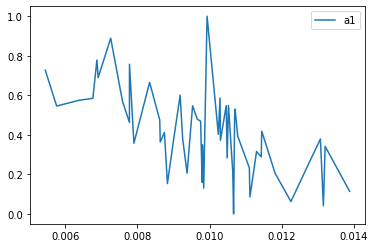

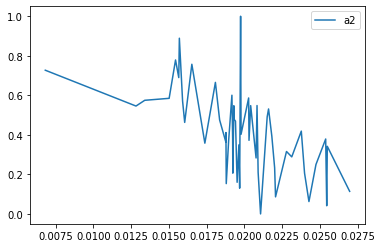

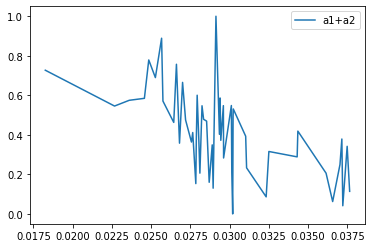

In [8]:
res_arg = np.argsort(res[:,0])
res = res[res_arg]

tr = tr.reshape(-1,)

plt.plot(res[:,0],tr,label = 'a1')
plt.legend()
plt.show()
res_arg = np.argsort(res[:,1])
res = res[res_arg]
plt.plot(res[:,1],tr, label='a2')
plt.legend()
plt.show()
res_arg = np.argsort(res[:,3])
res = res[res_arg]
plt.plot(res[:,3],tr, label = 'a1+a2')
plt.legend()
plt.show()

In [117]:
scaler.fit_transform([[1.,2.,3.],[2,3,1],[2,3,1]])

array([[-1.41421356, -1.41421356,  1.41421356],
       [ 0.70710678,  0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678, -0.70710678]])

In [ ]:
i+=1
df_res.to_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/2决策模型/data/SA/resolutio_{}.xlsx'.format(i))

In [32]:
res.shape

(50, 4)

In [28]:
res_arg = np.argsort(res[:,3])
res = res[res_arg]

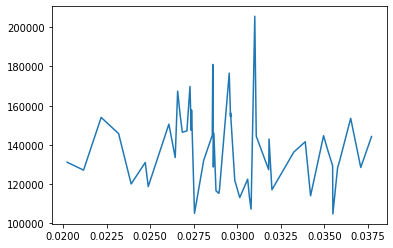

In [34]:
plt.plot(res[:,3],res[:,2])